In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
names = {
    'cifar10_model5_withIndices_results' : 'CIFAR-10 ClusterMatch',
    'colour_segmentation_cifar10' : 'CIFAR-10 Colour Segmentation',
    'uci_cm_results' : 'UCI ClusterMatch',
    'uci_fm_results' : 'UCI FeatureMatch',
    'utk_cm_data' : 'UTK ClusterMatch',
    'utk_fm_data' : 'UTK FeatureMatch',
}

In [183]:
x = 'colour_segmentation_cifar10'
data = pd.read_csv(f'data/results/{x}.csv')
data.head()

,Model,Cluster index,Cluster count,Poison rate,Number of poisoned samples,Aux indices,Test indices,Original dataset size,Poisoned dataset size,Number of samples tested on poisoned model,...,Subpop Baseline Accuracy,Subpop Baseline Loss,Subpop Baseline Precision,Subpop Baseline Recall,Subpop Baseline F1,Collateral Model Accuracy,Collateral Model Loss,Collateral Model Precision,Collateral Model Recall,Collateral Model F1
0,4,0,181,0.5,90,"[0, 202, 234, 297, 518, 702, 716, 851, 875, 93...","[151, 379, 718, 734, 1133, 1204, 1303, 1450, 1...",25000,25090,64,...,82.8125,0.579651,0.751012,0.769949,0.760363,80.72,0.668855,0.827045,0.8072,0.817002
1,4,0,181,1.0,181,"[0, 202, 234, 297, 518, 702, 716, 851, 875, 93...","[151, 379, 718, 734, 1133, 1204, 1303, 1450, 1...",25000,25181,64,...,82.8125,0.579651,0.751012,0.769949,0.760363,79.79,0.709250,0.821209,0.7979,0.809387
2,4,0,181,2.0,362,"[0, 202, 234, 297, 518, 702, 716, 851, 875, 93...","[151, 379, 718, 734, 1133, 1204, 1303, 1450, 1...",25000,25362,64,...,82.8125,0.579651,0.751012,0.769949,0.760363,79.79,0.725440,0.817733,0.7979,0.807695
3,4,1,436,0.5,218,"[66, 236, 244, 272, 290, 306, 316, 321, 362, 3...","[40, 164, 216, 244, 247, 285, 375, 434, 485, 4...",25000,25218,200,...,82.5000,0.552098,0.795174,0.800569,0.797862,81.15,0.642303,0.823208,0.8115,0.817312
4,4,1,436,1.0,436,"[66, 236, 244, 272, 290, 306, 316, 321, 362, 3...","[40, 164, 216, 244, 247, 285, 375, 434, 485, 4...",25000,25436,200,...,82.5000,0.552098,0.795174,0.800569,0.797862,81.44,0.652581,0.819438,0.8144,0.816911


## Calculate target and collateral damages

In [184]:
data['Target Damage'] = (data['Subpop Baseline Accuracy'] - data['Target Model Accuracy']) / 100
data['Collateral Damage'] = (data['Clean Model Accuracy'] - data['Collateral Model Accuracy']) / 100

# data.loc[data['Number of samples tested on poisoned model'] <= 10, 'Target Damage'] = 0.0

pr_05 = data[data['Poison rate'] == 0.5]
pr_1 = data[data['Poison rate'] == 1.0]
pr_2 = data[data['Poison rate'] == 2.0]

In [186]:
data['Target Damage'].max()

0.8

## POISON RATE 0.5

In [187]:
print("POISON RATE 0.5")
print(f"Poison rate 0.5 mean: {pr_05['Target Damage'].mean()}")
print(f"Target damage min: {pr_05['Target Damage'].min()}")
print(f"Target damage max: {pr_05['Target Damage'].max()}")
print(f"Target damage std: {pr_05['Target Damage'].std()}")
print(f"Collateral damage mean: {pr_05['Collateral Damage'].mean()}")
print(f"Collateral damage min: {pr_05['Collateral Damage'].min()}")
print(f"Collateral damage max: {pr_05['Collateral Damage'].max()}")
print(f"Collateral damage std: {pr_05['Collateral Damage'].std()}")
print("\n")

pr_05_highest1_target = pr_05.nlargest(1, 'Target Damage')
pr_05_highest5_target = pr_05.nlargest(5, 'Target Damage')
pr_05_highest10_target = pr_05.nlargest(10, 'Target Damage')

pr_05_highest1_clusterIndex = pr_05_highest1_target['Cluster index']
pr_05_highest5_clusterIndex = pr_05_highest5_target['Cluster index']
pr_05_highest10_clusterIndex = pr_05_highest10_target['Cluster index']

pr_05_highest1_poison_count = pr_05_highest1_target['Number of poisoned samples']
pr_05_highest5_poison_count = pr_05_highest5_target['Number of poisoned samples']
pr_05_highest10_poison_count = pr_05_highest10_target['Number of poisoned samples']

print(f"Highest damage index: {pr_05_highest1_clusterIndex.values[0]}")
print(f"Highest 5 damage index: {pr_05_highest5_clusterIndex.values}")
print(f"Highest 10 damage index: {pr_05_highest10_clusterIndex.values}")
print("\n")

pr_05_highest_1_collat = pr_05_highest1_target['Collateral Damage']
pr_05_highest_5_collat = pr_05_highest5_target['Collateral Damage']
pr_05_highest_10_collat = pr_05_highest10_target['Collateral Damage']
pr_05_highest1_loss, pr_05_highest1_baseline_loss = pr_05_highest1_target['Target Model Loss'], pr_05_highest1_target['Subpop Baseline Loss']
pr_05_highest5_loss, pr_05_highest5_baseline_loss = pr_05_highest5_target['Target Model Loss'], pr_05_highest5_target['Subpop Baseline Loss']
pr_05_highest10_loss, pr_05_highest10_baseline_loss = pr_05_highest10_target['Target Model Loss'], pr_05_highest10_target['Subpop Baseline Loss']
pr_05_highest1_precision, pr_05_highest1_baseline_precision = pr_05_highest1_target['Target Model Precision'], pr_05_highest1_target['Subpop Baseline Precision']
pr_05_highest5_precision, pr_05_highest5_baseline_precision = pr_05_highest5_target['Target Model Precision'], pr_05_highest5_target['Subpop Baseline Precision']
pr_05_highest10_precision, pr_05_highest10_baseline_precision = pr_05_highest10_target['Target Model Precision'], pr_05_highest10_target['Subpop Baseline Precision']
pr_05_highest1_recall, pr_05_highest1_baseline_recall = pr_05_highest1_target['Target Model Recall'], pr_05_highest1_target['Subpop Baseline Recall']
pr_05_highest5_recall, pr_05_highest5_baseline_recall = pr_05_highest5_target['Target Model Recall'], pr_05_highest5_target['Subpop Baseline Recall']
pr_05_highest10_recall, pr_05_highest10_baseline_recall = pr_05_highest10_target['Target Model Recall'], pr_05_highest10_target['Subpop Baseline Recall']
pr_05_highest1_f1, pr_05_highest1_baseline_f1 = pr_05_highest1_target['Target Model F1'], pr_05_highest1_target['Subpop Baseline F1']
pr_05_highest5_f1, pr_05_highest5_baseline_f1 = pr_05_highest5_target['Target Model F1'], pr_05_highest5_target['Subpop Baseline F1']
pr_05_highest10_f1, pr_05_highest10_baseline_f1 = pr_05_highest10_target['Target Model F1'], pr_05_highest10_target['Subpop Baseline F1']

print(f"Highest individual target damage: {pr_05_highest1_target['Target Damage'].mean()}")
print(f"Highest 5 target damage: {pr_05_highest5_target['Target Damage'].mean()}")
print(f"Highest 10 target damage: {pr_05_highest10_target['Target Damage'].mean()}")
print(f"Highest individual collateral damage: {pr_05_highest_1_collat.mean()}")
print(f"Highest 5 collateral damage: {pr_05_highest_5_collat.mean()}")
print(f"Highest 10 collateral damage: {pr_05_highest_10_collat.mean()}")
print("\n")

print(f"Highest individual poison count: {pr_05_highest1_poison_count.mean()}")
print(f"Highest 5 poison count: {pr_05_highest5_poison_count.mean()}")
print(f"Highest 10 poison count: {pr_05_highest10_poison_count.mean()}")
print("\n")

print(f"Highest individual loss: {pr_05_highest1_loss.mean()}, Baseline loss: {pr_05_highest1_baseline_loss.mean()}")
print(f"Highest 5 loss: {pr_05_highest5_loss.mean()}, Baseline loss: {pr_05_highest5_baseline_loss.mean()}")
print(f"Highest 10 loss: {pr_05_highest10_loss.mean()}, Baseline loss: {pr_05_highest10_baseline_loss.mean()}")
print("\n")
print(f"Highest individual precision: {pr_05_highest1_precision.mean()}, Baseline precision: {pr_05_highest1_baseline_precision.mean()}")
print(f"Highest 5 precision: {pr_05_highest5_precision.mean()}, Baseline precision: {pr_05_highest5_baseline_precision.mean()}")
print(f"Highest 10 precision: {pr_05_highest10_precision.mean()}, Baseline precision: {pr_05_highest10_baseline_precision.mean()}")
print("\n")
print(f"Highest individual recall: {pr_05_highest1_recall.mean()}, Baseline recall: {pr_05_highest1_baseline_recall.mean()}")
print(f"Highest 5 recall: {pr_05_highest5_recall.mean()}, Baseline recall: {pr_05_highest5_baseline_recall.mean()}")
print(f"Highest 10 recall: {pr_05_highest10_recall.mean()}, Baseline recall: {pr_05_highest10_baseline_recall.mean()}")
print("\n")
print(f"Highest individual f1: {pr_05_highest1_f1.mean()}, Baseline f1: {pr_05_highest1_baseline_f1.mean()}")
print(f"Highest 5 f1: {pr_05_highest5_f1.mean()}, Baseline f1: {pr_05_highest5_baseline_f1.mean()}")
print(f"Highest 10 f1: {pr_05_highest10_f1.mean()}, Baseline f1: {pr_05_highest10_baseline_f1.mean()}")


POISON RATE 0.5
Poison rate 0.5 mean: 0.033053670906999996
Target damage min: -0.14814814819999994
Target damage max: 0.8
Target damage std: 0.09799164030135715
Collateral damage mean: 0.00039000000000000054
Collateral damage min: -0.024299999999999926
Collateral damage max: 0.07659999999999996
Collateral damage std: 0.015712997257948048


Highest damage index: 89
Highest 5 damage index: [89 76 65 82 87]
Highest 10 damage index: [89 76 65 82 87 20 16 50 59 26]


Highest individual target damage: 0.8
Highest 5 target damage: 0.29149978042
Highest 10 target damage: 0.20414955880000002
Highest individual collateral damage: -0.014899999999999948
Highest 5 collateral damage: -0.012799999999999982
Highest 10 collateral damage: -0.000639999999999985


Highest individual poison count: 8.0
Highest 5 poison count: 33.4
Highest 10 poison count: 47.1


Highest individual loss: 2.012206316, Baseline loss: 0.165432066
Highest 5 loss: 1.1306013704000002, Baseline loss: 0.5257000624000001
Highest 10 l

## POISON RATE 1

In [188]:
print("POISON RATE 1.0")
print(f"Poison rate 1.0 mean: {pr_1['Target Damage'].mean()}")
print(f"Target damage min: {pr_1['Target Damage'].min()}")
print(f"Target damage max: {pr_1['Target Damage'].max()}")
print(f"Target damage std: {pr_1['Target Damage'].std()}")
print(f"Collateral damage mean: {pr_1['Collateral Damage'].mean()}")
print(f"Collateral damage min: {pr_1['Collateral Damage'].min()}")
print(f"Collateral damage max: {pr_1['Collateral Damage'].max()}")
print(f"Collateral damage std: {pr_1['Collateral Damage'].std()}")
print("\n")

pr_1_highest1_target = pr_1.nlargest(1, 'Target Damage')
pr_1_highest5_target = pr_1.nlargest(5, 'Target Damage')
pr_1_highest10_target = pr_1.nlargest(10, 'Target Damage')

pr_1_highest1_clusterIndex = pr_1_highest1_target['Cluster index']
pr_1_highest5_clusterIndex = pr_1_highest5_target['Cluster index']
pr_1_highest10_clusterIndex = pr_1_highest10_target['Cluster index']

pr_1_highest1_poison_count = pr_1_highest1_target['Number of poisoned samples']
pr_1_highest5_poison_count = pr_1_highest5_target['Number of poisoned samples']
pr_1_highest10_poison_count = pr_1_highest10_target['Number of poisoned samples']

print(f"Highest damage index: {pr_1_highest1_clusterIndex.values[0]}")
print(f"Highest 5 damage index: {pr_1_highest5_clusterIndex.values}")
print(f"Highest 10 damage index: {pr_1_highest10_clusterIndex.values}")
print("\n")

pr_1_highest_1_collat = pr_1_highest1_target['Collateral Damage']
pr_1_highest_5_collat = pr_1_highest5_target['Collateral Damage']
pr_1_highest_10_collat = pr_1_highest10_target['Collateral Damage']
pr_1_highest_1_loss, pr_1_highest1_baseline_loss = pr_1_highest1_target['Target Model Loss'], pr_1_highest1_target['Subpop Baseline Loss']
pr_1_highest_5_loss, pr_1_highest5_baseline_loss = pr_1_highest5_target['Target Model Loss'], pr_1_highest5_target['Subpop Baseline Loss']
pr_1_highest_10_loss, pr_1_highest10_baseline_loss = pr_1_highest10_target['Target Model Loss'], pr_1_highest10_target['Subpop Baseline Loss']
pr_1_highest_1_precision, pr_1_highest1_baseline_precision = pr_1_highest1_target['Target Model Precision'], pr_1_highest1_target['Subpop Baseline Precision']
pr_1_highest_5_precision, pr_1_highest5_baseline_precision = pr_1_highest5_target['Target Model Precision'], pr_1_highest5_target['Subpop Baseline Precision']
pr_1_highest_10_precision, pr_1_highest10_baseline_precision = pr_1_highest10_target['Target Model Precision'], pr_1_highest10_target['Subpop Baseline Precision']
pr_1_highest_1_recall, pr_1_highest1_baseline_recall = pr_1_highest1_target['Target Model Recall'], pr_1_highest1_target['Subpop Baseline Recall']
pr_1_highest_5_recall, pr_1_highest5_baseline_recall = pr_1_highest5_target['Target Model Recall'], pr_1_highest5_target['Subpop Baseline Recall']
pr_1_highest_10_recall, pr_1_highest10_baseline_recall = pr_1_highest10_target['Target Model Recall'], pr_1_highest10_target['Subpop Baseline Recall']
pr_1_highest_1_f1, pr_1_highest1_baseline_f1 = pr_1_highest1_target['Target Model F1'], pr_1_highest1_target['Subpop Baseline F1']
pr_1_highest_5_f1, pr_1_highest5_baseline_f1 = pr_1_highest5_target['Target Model F1'], pr_1_highest5_target['Subpop Baseline F1']
pr_1_highest_10_f1, pr_1_highest10_baseline_f1 = pr_1_highest10_target['Target Model F1'], pr_1_highest10_target['Subpop Baseline F1']

print(f"Highest individual target damage: {pr_1_highest1_target['Target Damage'].mean()}")
print(f"Highest 5 target damage: {pr_1_highest5_target['Target Damage'].mean()}")
print(f"Highest 10 target damage: {pr_1_highest10_target['Target Damage'].mean()}")
print(f"Highest individual collateral damage: {pr_1_highest_1_collat.mean()}")
print(f"Highest 5 collateral damage: {pr_1_highest_5_collat.mean()}")
print(f"Highest 10 collateral damage: {pr_1_highest_10_collat.mean()}")
print("\n")

print(f"Highest individual poison count: {pr_1_highest1_poison_count.mean()}")
print(f"Highest 5 poison count: {pr_1_highest5_poison_count.mean()}")
print(f"Highest 10 poison count: {pr_1_highest10_poison_count.mean()}")
print("\n")

print(f"Highest individual loss: {pr_1_highest_1_loss.mean()}, Baseline loss: {pr_1_highest1_baseline_loss.mean()}")
print(f"Highest 5 loss: {pr_1_highest_5_loss.mean()}, Baseline loss: {pr_1_highest5_baseline_loss.mean()}")
print(f"Highest 10 loss: {pr_1_highest_10_loss.mean()}, Baseline loss: {pr_1_highest10_baseline_loss.mean()}")
print("\n")
print(f"Highest individual precision: {pr_1_highest_1_precision.mean()}, Baseline precision: {pr_1_highest1_baseline_precision.mean()}")
print(f"Highest 5 precision: {pr_1_highest_5_precision.mean()}, Baseline precision: {pr_1_highest5_baseline_precision.mean()}")
print(f"Highest 10 precision: {pr_1_highest_10_precision.mean()}, Baseline precision: {pr_1_highest10_baseline_precision.mean()}")
print("\n")
print(f"Highest individual recall: {pr_1_highest_1_recall.mean()}, Baseline recall: {pr_1_highest1_baseline_recall.mean()}")
print(f"Highest 5 recall: {pr_1_highest_5_recall.mean()}, Baseline recall: {pr_1_highest5_baseline_recall.mean()}")
print(f"Highest 10 recall: {pr_1_highest_10_recall.mean()}, Baseline recall: {pr_1_highest10_baseline_recall.mean()}")
print("\n")
print(f"Highest individual f1: {pr_1_highest_1_f1.mean()}, Baseline f1: {pr_1_highest1_baseline_f1.mean()}")
print(f"Highest 5 f1: {pr_1_highest_5_f1.mean()}, Baseline f1: {pr_1_highest5_baseline_f1.mean()}")
print(f"Highest 10 f1: {pr_1_highest_10_f1.mean()}, Baseline f1: {pr_1_highest10_baseline_f1.mean()}")

POISON RATE 1.0
Poison rate 1.0 mean: 0.034642449199999995
Target damage min: -0.1428571428000001
Target damage max: 0.2727272727
Target damage std: 0.06729250466853785
Collateral damage mean: -0.0006499999999999902
Collateral damage min: -0.02760000000000005
Collateral damage max: 0.04700000000000003
Collateral damage std: 0.013726568648744188


Highest damage index: 85
Highest 5 damage index: [85 15 58  3 45]
Highest 10 damage index: [85 15 58  3 45 36 40 72 94 50]


Highest individual target damage: 0.2727272727
Highest 5 target damage: 0.19297831953999997
Highest 10 target damage: 0.16136991833
Highest individual collateral damage: 0.002600000000000051
Highest 5 collateral damage: 0.024420000000000018
Highest 10 collateral damage: 0.010150000000000022


Highest individual poison count: 37.0
Highest 5 poison count: 854.4
Highest 10 poison count: 478.2


Highest individual loss: 0.739148736, Baseline loss: 0.139145911
Highest 5 loss: 0.917600495, Baseline loss: 0.37236600659999997
Hi

## POISON RATE 2

In [189]:
print("POISON RATE 2.0")
print(f"Poison rate 2.0 mean: {pr_2['Target Damage'].mean()}")
print(f"Target damage min: {pr_2['Target Damage'].min()}")
print(f"Target damage max: {pr_2['Target Damage'].max()}")
print(f"Target damage std: {pr_2['Target Damage'].std()}")
print(f"Collateral damage mean: {pr_2['Collateral Damage'].mean()}")
print(f"Collateral damage min: {pr_2['Collateral Damage'].min()}")
print(f"Collateral damage max: {pr_2['Collateral Damage'].max()}")
print(f"Collateral damage std: {pr_2['Collateral Damage'].std()}")
print("\n")

pr_2_highest1_target = pr_2.nlargest(1, 'Target Damage')
pr_2_highest5_target = pr_2.nlargest(5, 'Target Damage')
pr_2_highest10_target = pr_2.nlargest(10, 'Target Damage')

pr_2_highest1_clusterIndex = pr_2_highest1_target['Cluster index']
pr_2_highest5_clusterIndex = pr_2_highest5_target['Cluster index']
pr_2_highest10_clusterIndex = pr_2_highest10_target['Cluster index']

pr_2_highest1_poison_count = pr_2_highest1_target['Number of poisoned samples']
pr_2_highest5_poison_count = pr_2_highest5_target['Number of poisoned samples']
pr_2_highest10_poison_count = pr_2_highest10_target['Number of poisoned samples']

print(f"Highest damage index: {pr_2_highest1_clusterIndex.values[0]}")
print(f"Highest 5 damage index: {pr_2_highest5_clusterIndex.values}")
print(f"Highest 10 damage index: {pr_2_highest10_clusterIndex.values}")
print("\n")

pr_2_highest_1_collat = pr_2_highest1_target['Collateral Damage']
pr_2_highest_5_collat = pr_2_highest5_target['Collateral Damage']
pr_2_highest_10_collat = pr_2_highest10_target['Collateral Damage']
pr_2_highest_1_loss, pr_2_highest1_baseline_loss = pr_2_highest1_target['Target Model Loss'], pr_2_highest1_target['Subpop Baseline Loss']
pr_2_highest_5_loss, pr_2_highest5_baseline_loss = pr_2_highest5_target['Target Model Loss'], pr_2_highest5_target['Subpop Baseline Loss']
pr_2_highest_10_loss, pr_2_highest10_baseline_loss = pr_2_highest10_target['Target Model Loss'], pr_2_highest10_target['Subpop Baseline Loss']
pr_2_highest_1_precision, pr_2_highest1_baseline_precision = pr_2_highest1_target['Target Model Precision'], pr_2_highest1_target['Subpop Baseline Precision']
pr_2_highest_5_precision, pr_2_highest5_baseline_precision = pr_2_highest5_target['Target Model Precision'], pr_2_highest5_target['Subpop Baseline Precision']
pr_2_highest_10_precision, pr_2_highest10_baseline_precision = pr_2_highest10_target['Target Model Precision'], pr_2_highest10_target['Subpop Baseline Precision']
pr_2_highest_1_recall, pr_2_highest1_baseline_recall = pr_2_highest1_target['Target Model Recall'], pr_2_highest1_target['Subpop Baseline Recall']
pr_2_highest_5_recall, pr_2_highest5_baseline_recall = pr_2_highest5_target['Target Model Recall'], pr_2_highest5_target['Subpop Baseline Recall']
pr_2_highest_10_recall, pr_2_highest10_baseline_recall = pr_2_highest10_target['Target Model Recall'], pr_2_highest10_target['Subpop Baseline Recall']
pr_2_highest_1_f1, pr_2_highest1_baseline_f1 = pr_2_highest1_target['Target Model F1'], pr_2_highest1_target['Subpop Baseline F1']
pr_2_highest_5_f1, pr_2_highest5_baseline_f1 = pr_2_highest5_target['Target Model F1'], pr_2_highest5_target['Subpop Baseline F1']
pr_2_highest_10_f1, pr_2_highest10_baseline_f1 = pr_2_highest10_target['Target Model F1'], pr_2_highest10_target['Subpop Baseline F1']

print(f"Highest individual target damage: {pr_2_highest1_target['Target Damage'].mean()}")
print(f"Highest 5 target damage: {pr_2_highest5_target['Target Damage'].mean()}")
print(f"Highest 10 target damage: {pr_2_highest10_target['Target Damage'].mean()}")
print(f"Highest individual collateral damage: {pr_2_highest_1_collat.mean()}")
print(f"Highest 5 collateral damage: {pr_2_highest_5_collat.mean()}")
print(f"Highest 10 collateral damage: {pr_2_highest_10_collat.mean()}")
print("\n")

print(f"Highest individual poison count: {pr_2_highest1_poison_count.mean()}")
print(f"Highest 5 poison count: {pr_2_highest5_poison_count.mean()}")
print(f"Highest 10 poison count: {pr_2_highest10_poison_count.mean()}")
print("\n")

print(f"Highest individual loss: {pr_2_highest_1_loss.mean()}, Baseline loss: {pr_2_highest1_baseline_loss.mean()}")
print(f"Highest 5 loss: {pr_2_highest_5_loss.mean()}, Baseline loss: {pr_2_highest5_baseline_loss.mean()}")
print(f"Highest 10 loss: {pr_2_highest_10_loss.mean()}, Baseline loss: {pr_2_highest10_baseline_loss.mean()}")
print("\n")
print(f"Highest individual precision: {pr_2_highest_1_precision.mean()}, Baseline precision: {pr_2_highest1_baseline_precision.mean()}")
print(f"Highest 5 precision: {pr_2_highest_5_precision.mean()}, Baseline precision: {pr_2_highest5_baseline_precision.mean()}")
print(f"Highest 10 precision: {pr_2_highest_10_precision.mean()}, Baseline precision: {pr_2_highest10_baseline_precision.mean()}")
print("\n")
print(f"Highest individual recall: {pr_2_highest_1_recall.mean()}, Baseline recall: {pr_2_highest1_baseline_recall.mean()}")
print(f"Highest 5 recall: {pr_2_highest_5_recall.mean()}, Baseline recall: {pr_2_highest5_baseline_recall.mean()}")
print(f"Highest 10 recall: {pr_2_highest_10_recall.mean()}, Baseline recall: {pr_2_highest10_baseline_recall.mean()}")
print("\n")
print(f"Highest individual f1: {pr_2_highest_1_f1.mean()}, Baseline f1: {pr_2_highest1_baseline_f1.mean()}")
print(f"Highest 5 f1: {pr_2_highest_5_f1.mean()}, Baseline f1: {pr_2_highest5_baseline_f1.mean()}")
print(f"Highest 10 f1: {pr_2_highest_10_f1.mean()}, Baseline f1: {pr_2_highest10_baseline_f1.mean()}")

POISON RATE 2.0
Poison rate 2.0 mean: 0.050267798110999996
Target damage min: -0.2272727273000001
Target damage max: 0.4545454545
Target damage std: 0.08913382833637605
Collateral damage mean: 0.003947000000000007
Collateral damage min: -0.023799999999999953
Collateral damage max: 0.06709999999999994
Collateral damage std: 0.015955300281433347


Highest damage index: 85
Highest 5 damage index: [85  3 86 65  4]
Highest 10 damage index: [85  3 86 65  4 21 15 72 16 74]


Highest individual target damage: 0.4545454545
Highest 5 target damage: 0.3058873343
Highest 10 target damage: 0.23159967768
Highest individual collateral damage: -0.018400000000000034
Highest 5 collateral damage: 0.01995999999999998
Highest 10 collateral damage: 0.011729999999999989


Highest individual poison count: 74.0
Highest 5 poison count: 1440.8
Highest 10 poison count: 812.8


Highest individual loss: 1.132652879, Baseline loss: 0.139145911
Highest 5 loss: 1.40145342, Baseline loss: 0.5169632066000001
Highest 10 

## Plots

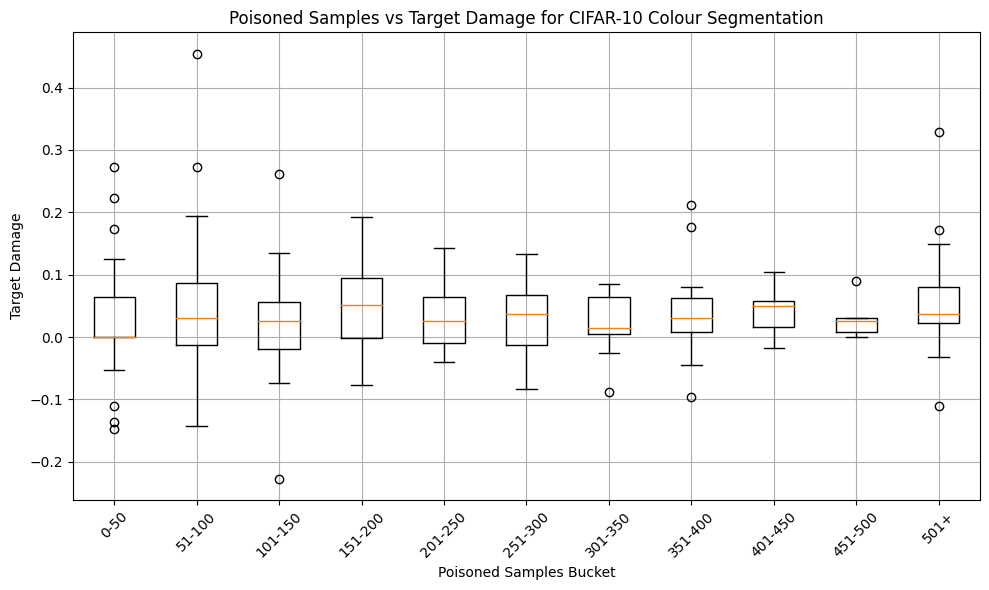

In [93]:
# box plot for cluster size vs target damage
# ranges of cluster size
# box for each cluster size bucket
# 0-20, 21-40, 41-60, 61-80, 81-100, 101-120, 121-140, 141-160, 161-180, 181-200, 201+

# create a new column for cluster size bucket

# bins = [0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, np.inf]
# labels = ['0-20', '21-40', '41-60', '61-80', '81-100', '101-120', '121-140', '141-160', '161-180', '181-200', '201+']

# # try different bin ranges
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, np.inf]
labels = ['0-50', '51-100', '101-150', '151-200', '201-250', '251-300', '301-350', '351-400', '401-450', '451-500', '501+']

# Bucketing 'Number of poisoned samples'
data['Poisoned Samples Bucket'] = pd.cut(data['Number of poisoned samples'], bins=bins, labels=labels)

plot_name = names[x]
# Creating the box plot
plt.figure(figsize=(10, 6))
plt.title(f'Poisoned Samples vs Target Damage for {plot_name}')
plt.xlabel('Poisoned Samples Bucket')
plt.ylabel('Target Damage')
plt.boxplot([data[data['Poisoned Samples Bucket'] == label]['Target Damage'] for label in labels], labels=labels)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig(f'visuals/{x}_target.pdf')
plt.show()

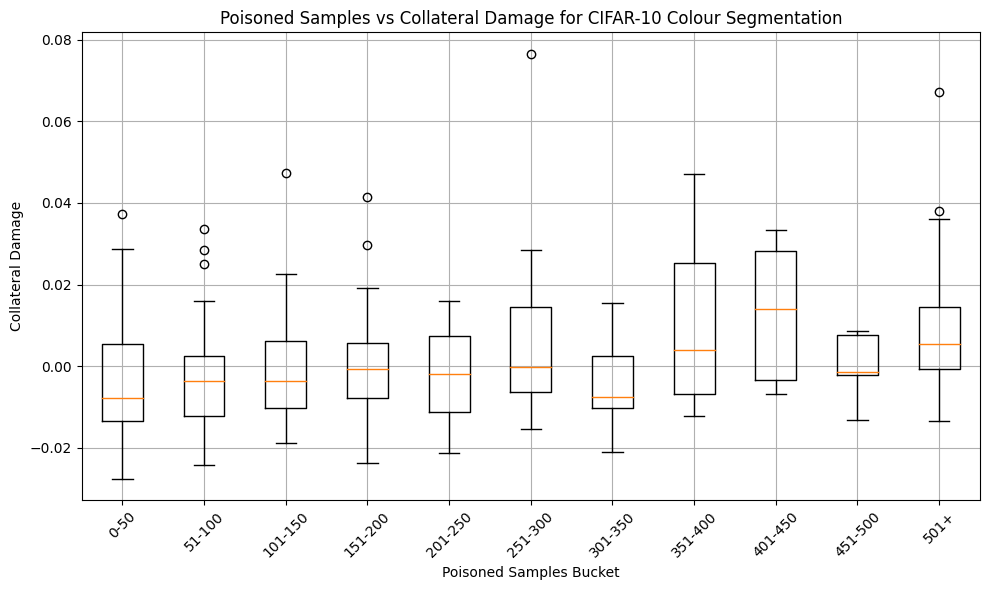

In [94]:
# same for collateral damage

plt.figure(figsize=(10, 6))
plt.title(f'Poisoned Samples vs Collateral Damage for {plot_name}')
plt.xlabel('Poisoned Samples Bucket')
plt.ylabel('Collateral Damage')
plt.boxplot([data[data['Poisoned Samples Bucket'] == label]['Collateral Damage'] for label in labels], labels=labels)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig(f'visuals/{x}_collateral.pdf')
plt.show()

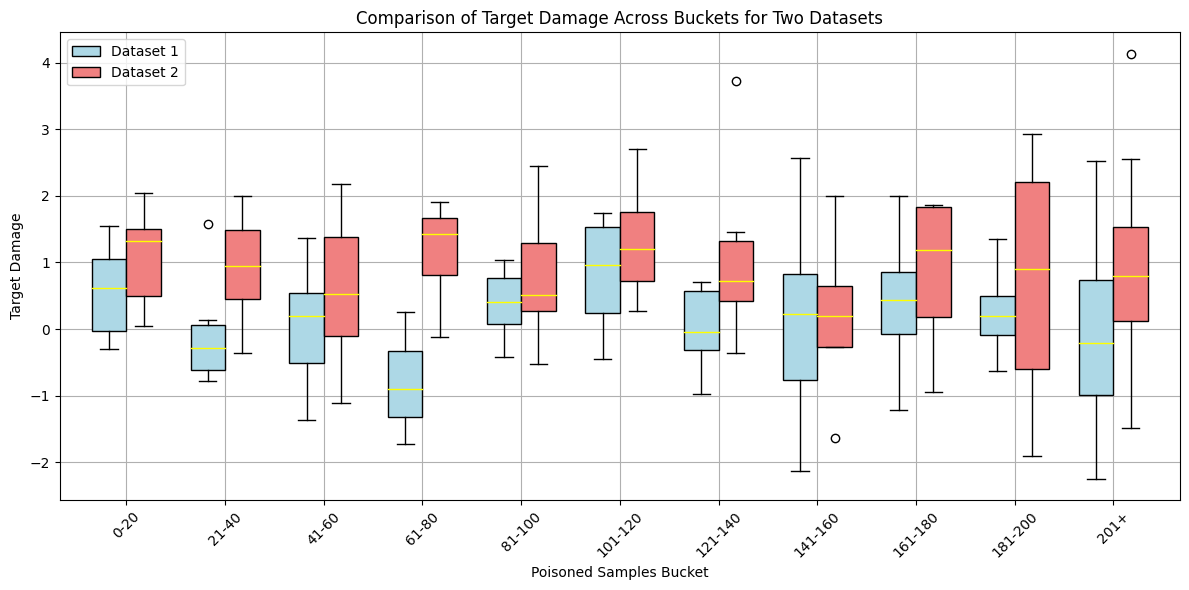

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Let's say you have two datasets
df1 = pd.DataFrame({
    'Number of poisoned samples': np.random.randint(0, 300, 100),
    'Target damage': np.random.randn(100)
})

df2 = pd.DataFrame({
    'Number of poisoned samples': np.random.randint(0, 300, 100),
    'Target damage': np.random.randn(100) + 1  # offset for visual difference
})

# Define buckets
bins = [0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, np.inf]
labels = ['0-20', '21-40', '41-60', '61-80', '81-100',
          '101-120', '121-140', '141-160', '161-180', '181-200', '201+']

# Add bucket labels to each DataFrame
df1['Bucket'] = pd.cut(df1['Number of poisoned samples'], bins=bins, labels=labels)
df2['Bucket'] = pd.cut(df2['Number of poisoned samples'], bins=bins, labels=labels)

# Prepare data for plotting
positions = np.arange(len(labels))  # x-axis base positions

box_width = 0.35
fig, ax = plt.subplots(figsize=(12, 6))

# Plot each dataset side-by-side in each bucket
bp1 = ax.boxplot(
    [df1[df1['Bucket'] == label]['Target damage'] for label in labels],
    positions=positions - box_width / 2,
    widths=box_width,
    patch_artist=True,
    boxprops=dict(facecolor='lightblue'),
    medianprops=dict(color='yellow')
)

bp2 = ax.boxplot(
    [df2[df2['Bucket'] == label]['Target damage'] for label in labels],
    positions=positions + box_width / 2,
    widths=box_width,
    patch_artist=True,
    boxprops=dict(facecolor='lightcoral'),
    medianprops=dict(color='yellow')
)

# Labels and styling
ax.set_xticks(positions)
ax.set_xticklabels(labels, rotation=45)
ax.set_xlabel('Poisoned Samples Bucket')
ax.set_ylabel('Target Damage')
ax.set_title('Comparison of Target Damage Across Buckets for Two Datasets')
ax.legend([bp1["boxes"][0], bp2["boxes"][0]], ['Dataset 1', 'Dataset 2'])

plt.tight_layout()
plt.grid(True)
plt.show()


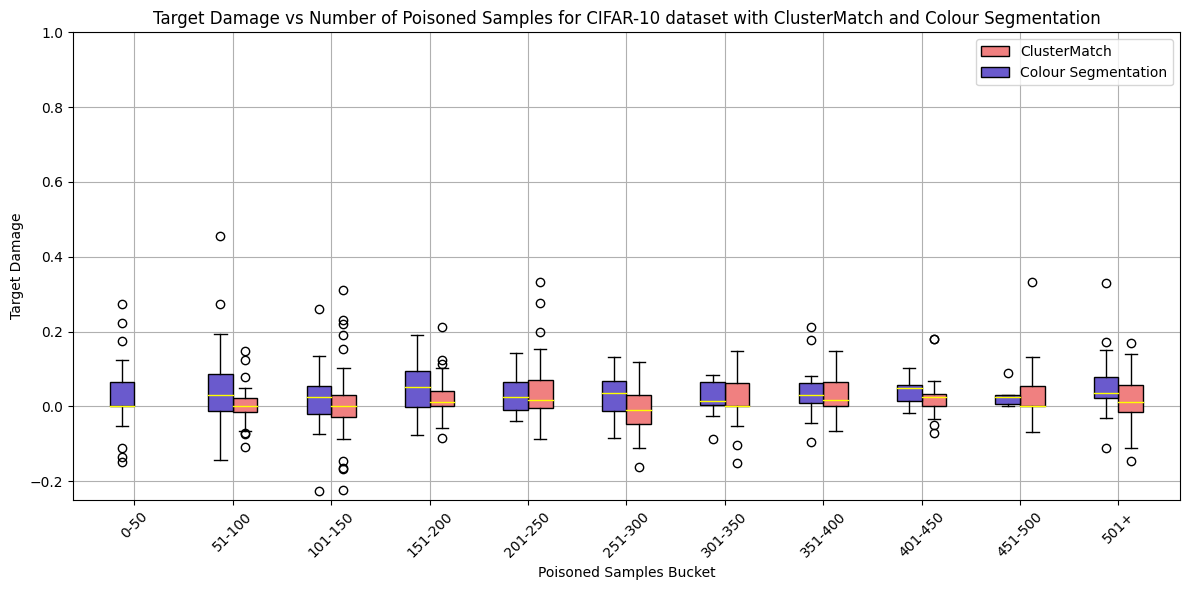

In [190]:
uci_fm = pd.read_csv('data/results/uci_fm_results.csv')
uci_cm = pd.read_csv('data/results/uci_cm_results.csv')
utk_fm = pd.read_csv('data/results/utk_fm_data.csv')
utk_cm = pd.read_csv('data/results/utk_cm_data.csv')
cifar = pd.read_csv('data/results/cifar10_model5_withIndices_results.csv')
colour = pd.read_csv('data/results/colour_segmentation_cifar10.csv')

uci_fm['Target Damage'] = (uci_fm['Subpop Baseline Accuracy'] - uci_fm['Target Model Accuracy'])
uci_cm['Target Damage'] = (uci_cm['Subpop Baseline Accuracy'] - uci_cm['Target Model Accuracy'])
utk_fm['Target Damage'] = (utk_fm['Subpop Baseline Accuracy'] - utk_fm['Target Model Accuracy']) / 100
utk_cm['Target Damage'] = (utk_cm['Subpop Baseline Accuracy'] - utk_cm['Target Model Accuracy']) / 100
cifar['Target Damage'] = (cifar['Subpop Baseline Accuracy'] - cifar['Target Model Accuracy']) / 100
colour['Target Damage'] = (colour['Subpop Baseline Accuracy'] - colour['Target Model Accuracy']) / 100
colour.loc[colour['Number of samples tested on poisoned model'] <= 10, 'Target Damage'] = 0.0
uci_fm['Collateral Damage'] = (uci_fm['Clean Model Accuracy'] - uci_fm['Collateral Model Accuracy'])
uci_cm['Collateral Damage'] = (uci_cm['Clean Model Accuracy'] - uci_cm['Collateral Model Accuracy'])
utk_fm['Collateral Damage'] = (utk_fm['Clean Model Accuracy'] - utk_fm['Collateral Model Accuracy']) / 100
utk_cm['Collateral Damage'] = (utk_cm['Clean Model Accuracy'] - utk_cm['Collateral Model Accuracy']) / 100
cifar['Collateral Damage'] = (cifar['Clean Model Accuracy'] - cifar['Collateral Model Accuracy']) / 100
colour['Collateral Damage'] = (colour['Clean Model Accuracy'] - colour['Collateral Model Accuracy']) / 100

# box plot together

bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, np.inf]
labels = ['0-50', '51-100', '101-150', '151-200', '201-250', '251-300', '301-350', '351-400', '401-450', '451-500', '501+']

# bins = [0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, np.inf]
# labels = ['0-20', '21-40', '41-60', '61-80', '81-100', '101-120', '121-140', '141-160', '161-180', '181-200', '201+']

# Bucketing 'Number of poisoned samples'
uci_fm['Poisoned Samples Bucket'] = pd.cut(uci_fm['Number of poisoned samples'], bins=bins, labels=labels)
uci_cm['Poisoned Samples Bucket'] = pd.cut(uci_cm['Number of poisoned samples'], bins=bins, labels=labels)
utk_fm['Poisoned Samples Bucket'] = pd.cut(utk_fm['Number of poisoned samples'], bins=bins, labels=labels)
utk_cm['Poisoned Samples Bucket'] = pd.cut(utk_cm['Number of poisoned samples'], bins=bins, labels=labels)
cifar['Poisoned Samples Bucket'] = pd.cut(cifar['Number of poisoned samples'], bins=bins, labels=labels)
colour['Poisoned Samples Bucket'] = pd.cut(colour['Number of poisoned samples'], bins=bins, labels=labels)

positions = np.arange(len(labels))

box_width = 0.25
fig, ax = plt.subplots(figsize=(12, 6))

# bp1 = ax.boxplot(
#     [uci_cm[uci_cm['Poisoned Samples Bucket'] == label]['Target Damage'] for label in labels],
#     positions=positions - box_width / 2,
#     widths=box_width,
#     patch_artist=True,
#     boxprops=dict(facecolor='lightblue'),
#     medianprops=dict(color='yellow')
# )

# bp2 = ax.boxplot(
#     [utk_cm[utk_cm['Poisoned Samples Bucket'] == label]['Target Damage'] for label in labels],
#     positions=positions + box_width / 2,
#     widths=box_width,
#     patch_artist=True,
#     boxprops=dict(facecolor='lightgreen'),
#     medianprops=dict(color='yellow')
# )

bp3 = ax.boxplot(
    [cifar[cifar['Poisoned Samples Bucket'] == label]['Target Damage'] for label in labels],
    positions=positions + box_width / 2,
    widths=box_width,
    patch_artist=True,
    boxprops=dict(facecolor='lightcoral'),
    medianprops=dict(color='yellow')
)

bp4 = ax.boxplot(
    [colour[colour['Poisoned Samples Bucket'] == label]['Target Damage'] for label in labels],
    positions=positions - box_width / 2,
    widths=box_width,
    patch_artist=True,
    boxprops=dict(facecolor='slateblue'),
    medianprops=dict(color='yellow')
)

# # Labels and styling
ax.set_xticks(positions)
ax.set_xticklabels(labels, rotation=45)
ax.set_xlabel('Poisoned Samples Bucket')
ax.set_ylabel('Target Damage')
ax.set_title('Target Damage vs Number of Poisoned Samples for CIFAR-10 dataset with ClusterMatch and Colour Segmentation')
ax.legend([bp3["boxes"][0], bp4["boxes"][0]], ['ClusterMatch', 'Colour Segmentation'])

plt.ylim(-0.25, 1)
plt.tight_layout()
plt.grid(True)
plt.savefig('visuals/new/cifar_combo_target.pdf')
plt.show()

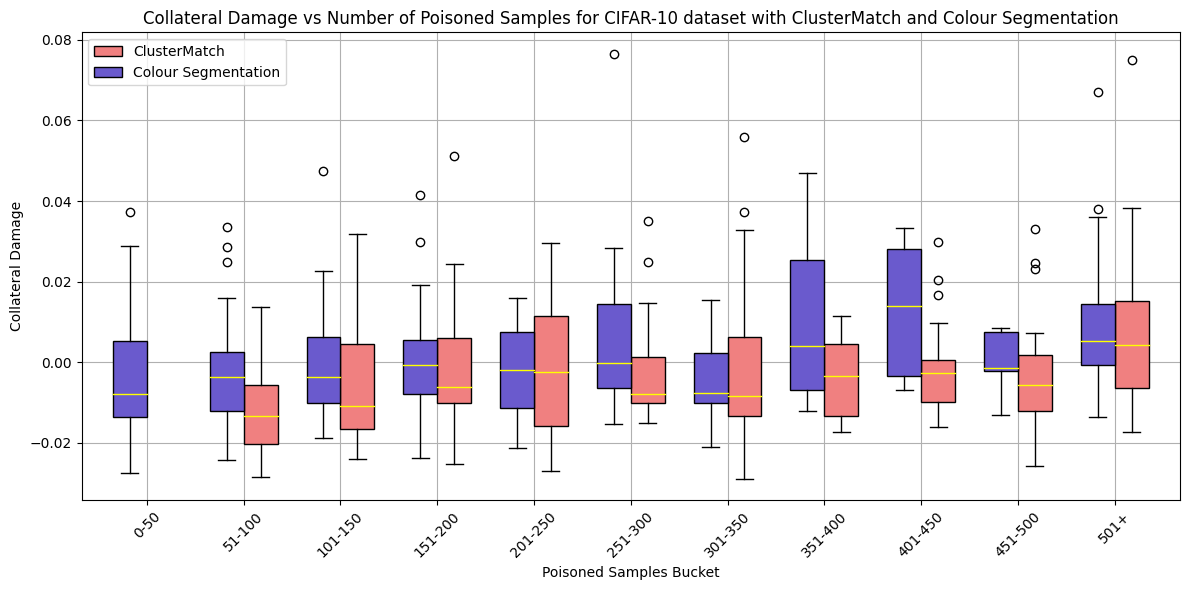

In [191]:
# repeat for collateral damage

positions = np.arange(len(labels))

box_width = 0.35
fig, ax = plt.subplots(figsize=(12, 6))

# bp1 = ax.boxplot(
#     [uci_fm[uci_fm['Poisoned Samples Bucket'] == label]['Collateral Damage'] for label in labels],
#     positions=positions,
#     widths=box_width,
#     patch_artist=True,
#     boxprops=dict(facecolor='lightblue'),
#     medianprops=dict(color='yellow')
# )

# bp2 = ax.boxplot(
#     [utk_fm[utk_fm['Poisoned Samples Bucket'] == label]['Collateral Damage'] for label in labels],
#     positions=positions,
#     widths=box_width,
#     patch_artist=True,
#     boxprops=dict(facecolor='lightgreen'),
#     medianprops=dict(color='yellow')
# )

bp3 = ax.boxplot(
    [cifar[cifar['Poisoned Samples Bucket'] == label]['Collateral Damage'] for label in labels],
    positions=positions + box_width / 2,
    widths=box_width,
    patch_artist=True,
    boxprops=dict(facecolor='lightcoral'),
    medianprops=dict(color='yellow')
)

bp4 = ax.boxplot(
    [colour[colour['Poisoned Samples Bucket'] == label]['Collateral Damage'] for label in labels],
    positions=positions - box_width / 2,
    widths=box_width,
    patch_artist=True,
    boxprops=dict(facecolor='slateblue'),
    medianprops=dict(color='yellow')
)

# Labels and styling
ax.set_xticks(positions)
ax.set_xticklabels(labels, rotation=45)
ax.set_xlabel('Poisoned Samples Bucket')
ax.set_ylabel('Collateral Damage')
ax.set_title('Collateral Damage vs Number of Poisoned Samples for CIFAR-10 dataset with ClusterMatch and Colour Segmentation')
ax.legend([bp3["boxes"][0], bp4["boxes"][0]], ['ClusterMatch', 'Colour Segmentation'])

# plt.ylim(-0.02, 0.12)
plt.tight_layout()
plt.grid(True)
plt.savefig('visuals/new/cifar_combo_collat.pdf')
plt.show()

In [ ]:
# I think I will put UTK collats in the appendix